In [20]:
# %load ../utils/standard_library_import.py
%load_ext autoreload
%autoreload 2

import json
import GoH.analyze_model
import gspread
from matplotlib import pyplot as plt
from oauth2client.service_account import ServiceAccountCredentials
import os
import pandas as pd
import seaborn as sns

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# %load ../utils/import_and_preprocess_supporting_model_data.py
dataDir = "../../data/"

# Load data from Google Doc
scope = ['https://spreadsheets.google.com/feeds']
secrets = "/Users/jeriwieringa/Dissertation/dev/drafts/code/secrets/dissertation-881847769b13.json"
credentials = ServiceAccountCredentials.from_json_keyfile_name(secrets, scope)
gc = gspread.authorize(credentials)
dts = gc.open('Topic Labels').sheet1

labels = pd.DataFrame(dts.get_all_records())

with open(os.path.join(dataDir, 'params_target_300_10.18497.json')) as f:
    params = json.load(f)

metadata = pd.read_csv(os.path.join(dataDir, 'meta.csv'), header=None).reset_index()
metadata.columns = ['doc_id', 'filename', 'citation', 'author', 
                    'periodical_name', 'volume', 'issue', 
                    'date', 'page', 'url', 'abrev']
metadata['date_formatted'] = pd.to_datetime(metadata['date'])

In [3]:
imageFolder = "../../site/images/"

In [4]:
dt = pd.read_csv(os.path.join(dataDir, 'dt_target_300_10.18497.csv'))

In [5]:
alldata = GoH.analyze_model.prepare_data_set(dt, metadata, 
                                             smooth_value=params['alpha_sum'], smooth=True,
                                             subset=False, doc_set="",  
                                             norm=True, verify=True)

1.0


In [6]:
# Excluding the Youth's Instructor because it is very spotty in coverage for the first 4 decades.
denominational_titles = ['RH', 'ST', 'ARAI', 'GCB', 'PTAR','TCOG']
denomData = GoH.analyze_model.prepare_data_set(dt, metadata,
                                               smooth_value=params['alpha_sum'], smooth=True,
                                               subset=True, doc_set=denominational_titles,
                                               norm=True, verify=True)

1.0


## Prophecy

In [7]:
def explore_topic_subset(topic_category):
    subset = labels[labels['topic_category'] == topic_category].mallet_topic_id.tolist()
    
    title="Aggregated Prevalence Across Whole Corpus of {} Topics per Year".format(topic_category.capitalize())
    GoH.analyze_model.plot_and_sum_topics(alldata, subset, title)
    plt.savefig(os.path.join(imageFolder, 'allData_aggregated{}Topics.png'.format(topic_category.capitalize())), bbox_inches='tight')
    
    title="Aggregated Prevalence Across Denominational Titles of {} Topics per Year".format(topic_category.capitalize())
    GoH.analyze_model.plot_and_sum_topics(denomData, subset, title)
    plt.savefig(os.path.join(imageFolder, 'denomData_aggregated{}Topics.png'.format(topic_category.capitalize())), bbox_inches='tight')

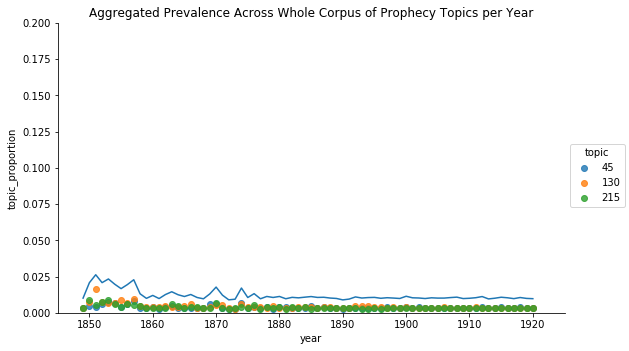

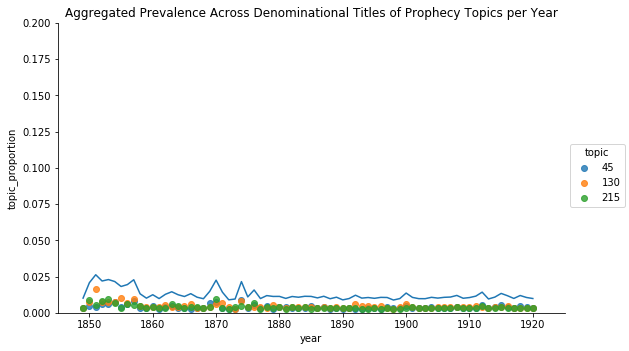

In [8]:
explore_topic_subset('prophecy')

## Second Coming

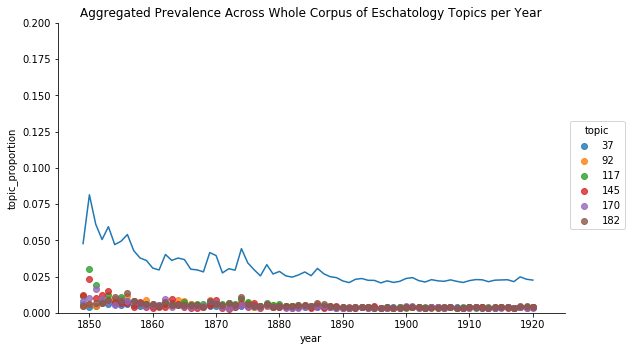

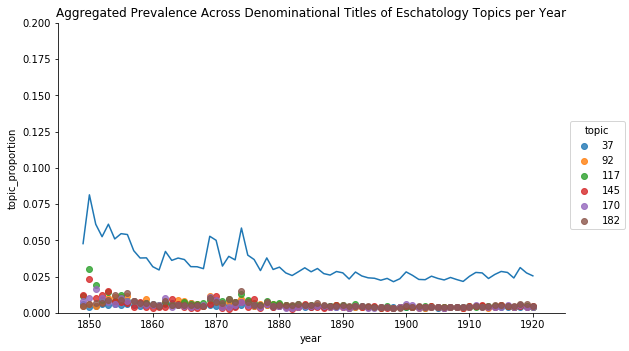

In [22]:
explore_topic_subset('eschatology')

## Signs of the Times

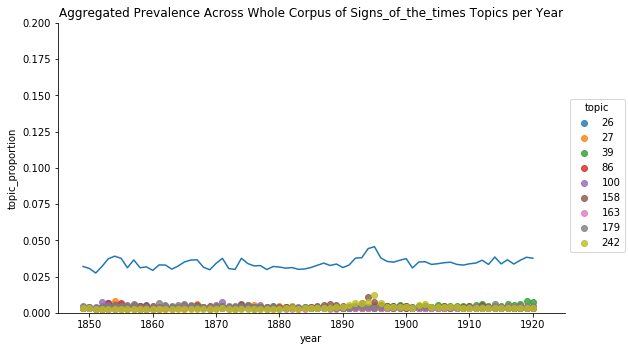

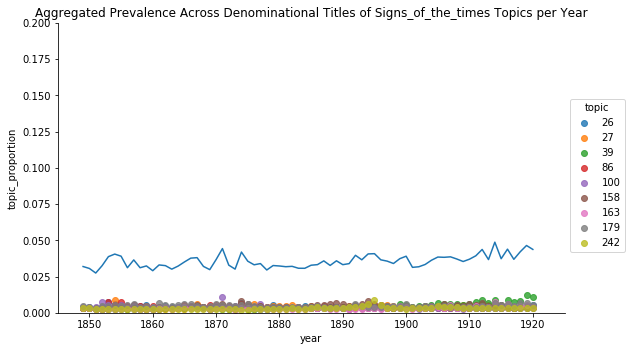

In [23]:
explore_topic_subset('signs_of_the_times')

## Church and State

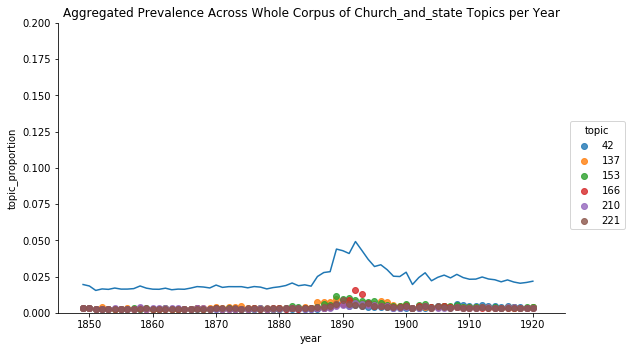

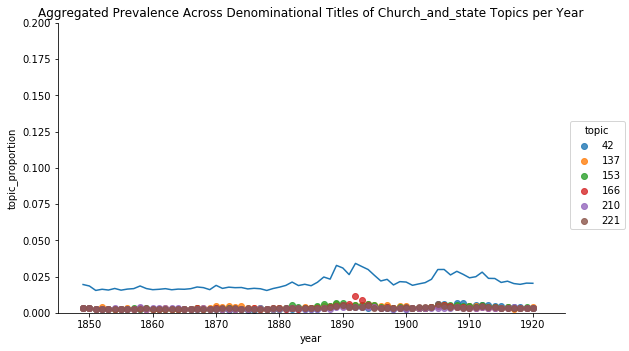

In [24]:
explore_topic_subset('church_and_state')

## All End Times Topics

In [29]:
compiled_topics = labels[labels['topic_category'].isin(['prophecy','eschatology','signs_of_the_times','church_and_state'])].mallet_topic_id.tolist()
print(compiled_topics)

[26, 27, 37, 39, 42, 45, 86, 92, 100, 117, 130, 137, 145, 153, 158, 163, 166, 170, 179, 182, 210, 215, 221, 242]


In [30]:
import GoH.analyze_model

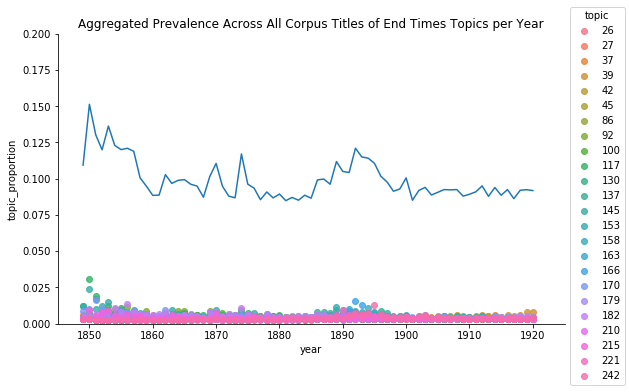

In [31]:
title="Aggregated Prevalence Across All Corpus Titles of End Times Topics per Year"
GoH.analyze_model.plot_and_sum_topics(alldata, compiled_topics, title)
plt.savefig(os.path.join(imageFolder, '{}_aggregated{}Topics.png'.format('allTitles', 'EndTimes')), bbox_inches='tight')

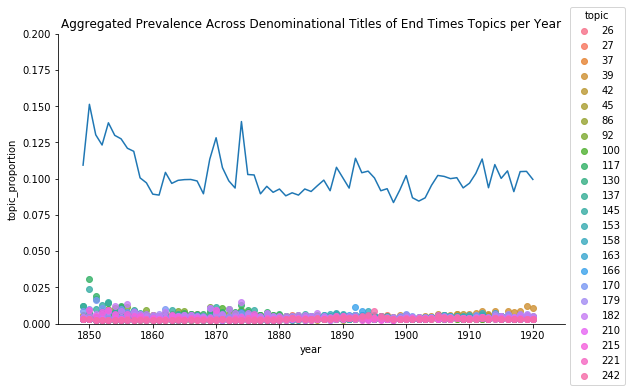

In [32]:
title="Aggregated Prevalence Across Denominational Titles of End Times Topics per Year"
GoH.analyze_model.plot_and_sum_topics(denomData, compiled_topics, title)
plt.savefig(os.path.join(imageFolder, '{}_aggregated{}Topics.png'.format('denomTitles', 'EndTimes')), bbox_inches='tight')

## Check Correlation of these topics

In [103]:
raw_data = GoH.analyze_model.prepare_data_set(dt, metadata, 
                                             smooth_value=params['alpha_sum'], smooth=False,
                                             subset=False, doc_set="",  
                                             norm=True, verify=True)

1.0


In [127]:
raw_data[:2]

,topic,year,topic_proportion
0,0,1849,0.000464
1,0,1850,0.000747


In [107]:
dtm = dt.pivot(index="doc_id", columns="topic", values="word_counts")

In [108]:
m = dtm.div(dtm.sum(axis=1), axis=0)

In [109]:
m[:5]

topic,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
doc_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.008621,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.039216,0.009804,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,0.009259,NaN,NaN,0.166667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.057851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.008264,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
corrMatrix = m.corr()

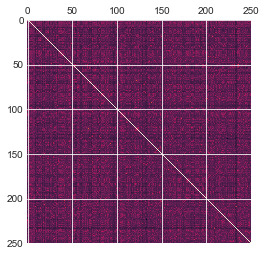

In [112]:
plt.matshow(corrMatrix)

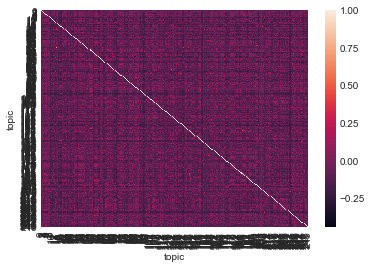

In [114]:
sns.heatmap(corrMatrix, 
            xticklabels=corrMatrix.columns.values,
            yticklabels=corrMatrix.columns.values)

In [120]:
corrList = corrMatrix.abs().unstack()

In [121]:
corrList[:10]

topic  topic
0      0        1.000000
       1        0.110230
       2        0.060539
       3        0.199273
       4        0.127803
       5        0.030449
       6        0.144511
       7        0.009228
       8        0.067971
       9        0.035090
dtype: float64

In [125]:
# From https://stackoverflow.com/questions/17778394/
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


def get_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

In [124]:
get_top_abs_correlations(m)

topic  topic
15     43       0.697308
68     122      0.467616
139    188      0.448418
133    223      0.446369
93     138      0.429951
dtype: float64

In [126]:
correlations = get_correlations(m)

In [128]:
correlations[:5]

topic  topic
15     43       0.697308
68     122      0.467616
139    188      0.448418
133    223      0.446369
93     138      0.429951
dtype: float64

In [136]:
correlations.to_frame().reset_index(drop=True)

,0
0,0.697308
1,0.467616
2,0.448418
3,0.446369
4,0.429951
5,0.409623
6,0.405329
7,0.385769
8,0.375229
9,0.375069


In [134]:
correlations[correlations['topic'].isin(compiled_topics)]

KeyError: 'topic'